<a href="https://colab.research.google.com/github/tarakantaacharya/Xray-Disease-Predictor/blob/main/Copy_of_OriginalModelCovidPneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

Dataset URL: https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia
License(s): unknown
chest-xray-covid19-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-covid19-pneumonia.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Data/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Data/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256),
)

Found 5144 files belonging to 3 classes.
Found 1288 files belonging to 3 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(256, 256, 3)),  # Input layer specifies the shape
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(3, activation='softmax')  # Change here for 3 class labels
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,323 (56.64 MB)

 Trainable params: 14,847,875 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Compile the model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall', 'auc'])

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import tensorflow as tf
class StopAtAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy):
        super(StopAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy')
        if val_accuracy >= self.target_accuracy:
            print(f"\nReached {self.target_accuracy*100:.2f}% validation accuracy. Stopping training!")
            self.model.stop_training = True

# Use the callback in model fitting
target_accuracy = 0.90
stop_at_accuracy = StopAtAccuracy(target_accuracy)

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=20,  # Set a high number of epochs to allow for early stopping
    callbacks=[stop_at_accuracy]
)


Epoch 1/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 75s 423ms/step - accuracy: 0.8139 - auc: 0.8902 - loss: 3.8603 - precision: 0.8174 - recall: 0.8126 - val_accuracy: 0.2321 - val_auc: 0.4475 - val_loss: 19.9863 - val_precision: 0.2321 - val_recall: 0.2321
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 86s 477ms/step - accuracy: 0.8613 - auc: 0.9408 - loss: 1.2090 - precision: 0.8654 - recall: 0.8570 - val_accuracy: 0.7453 - val_auc: 0.8257 - val_loss: 7.2207 - val_precision: 0.7465 - val_recall: 0.7453
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 60s 341ms/step - accuracy: 0.8953 - auc: 0.9728 - loss: 0.4131 - precision: 0.9160 - recall: 0.8680 - val_accuracy: 0.8339 - val_auc: 0.9418 - val_loss: 0.8171 - val_precision: 0.8735 - val_recall: 0.8043
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 80s 332ms/step - accuracy: 0.9175 - auc: 0.9796 - loss: 0.3238 - precision: 0.9409 - recall: 0.8877 - val_accuracy: 0.8843 - val_auc: 0.9712 - val_loss: 0.3603 - val_precision: 0.8912 - val_recall: 0.8649
Epoch 5/20
161/161 

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Check if the model training completed successfully.
if history.history:
    print('Train accuracy:', history.history['accuracy'][-1] * 100)
    print('Test accuracy:', history.history['val_accuracy'][-1] * 100)
    print('Train loss:', history.history['loss'][-1])
    print('Test loss:', history.history['val_loss'][-1])
    print('Train precision:', history.history['precision'][-1])
    print('Test precision:', history.history['val_precision'][-1])
    print('Train recall:', history.history['recall'][-1])
    print('Test recall:', history.history['val_recall'][-1])
    print('Train AUC:', history.history['auc'][-1])
    print('Test AUC:', history.history['val_auc'][-1])

    # Generate predictions on the test set
    y_true = np.concatenate([y for x, y in validation_ds], axis=0)
    y_pred = model.predict(validation_ds)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(y_true, axis=1), y_pred_classes)
    print('Confusion Matrix:')
    print(cm)

    # Classification Report
    report = classification_report(np.argmax(y_true, axis=1), y_pred_classes)
    print('Classification Report:')
    print(report)

    # F1 Score (can be calculated from precision and recall)
    f1_scores = 2 * (history.history['precision'][-1] * history.history['recall'][-1]) / (history.history['precision'][-1] + history.history['recall'][-1])
    print('Train F1 Score:', f1_scores)
    # Calculate test F1 score using classification report if necessary

    print("Model training completed successfully.")
else:
    print("Model training did not complete successfully. Check for errors during training.")


Train accuracy: 92.45722889900208
Test accuracy: 91.22670888900757
Train loss: 0.28431588411331177
Test loss: 0.3840070366859436
Train precision: 0.9485971927642822
Test precision: 0.9146437048912048
Train recall: 0.9004665613174438
Test recall: 0.9068322777748108
Train AUC: 0.9834482073783875
Test AUC: 0.9734755754470825
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step
Confusion Matrix:
[[  8  22  86]
 [ 23  72 222]
 [ 60 205 590]]
Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.07      0.08       116
           1       0.24      0.23      0.23       317
           2       0.66      0.69      0.67       855

    accuracy                           0.52      1288
   macro avg       0.33      0.33      0.33      1288
weighted avg       0.50      0.52      0.51      1288

Train F1 Score: 0.9239054633549213
Model training completed successfully.


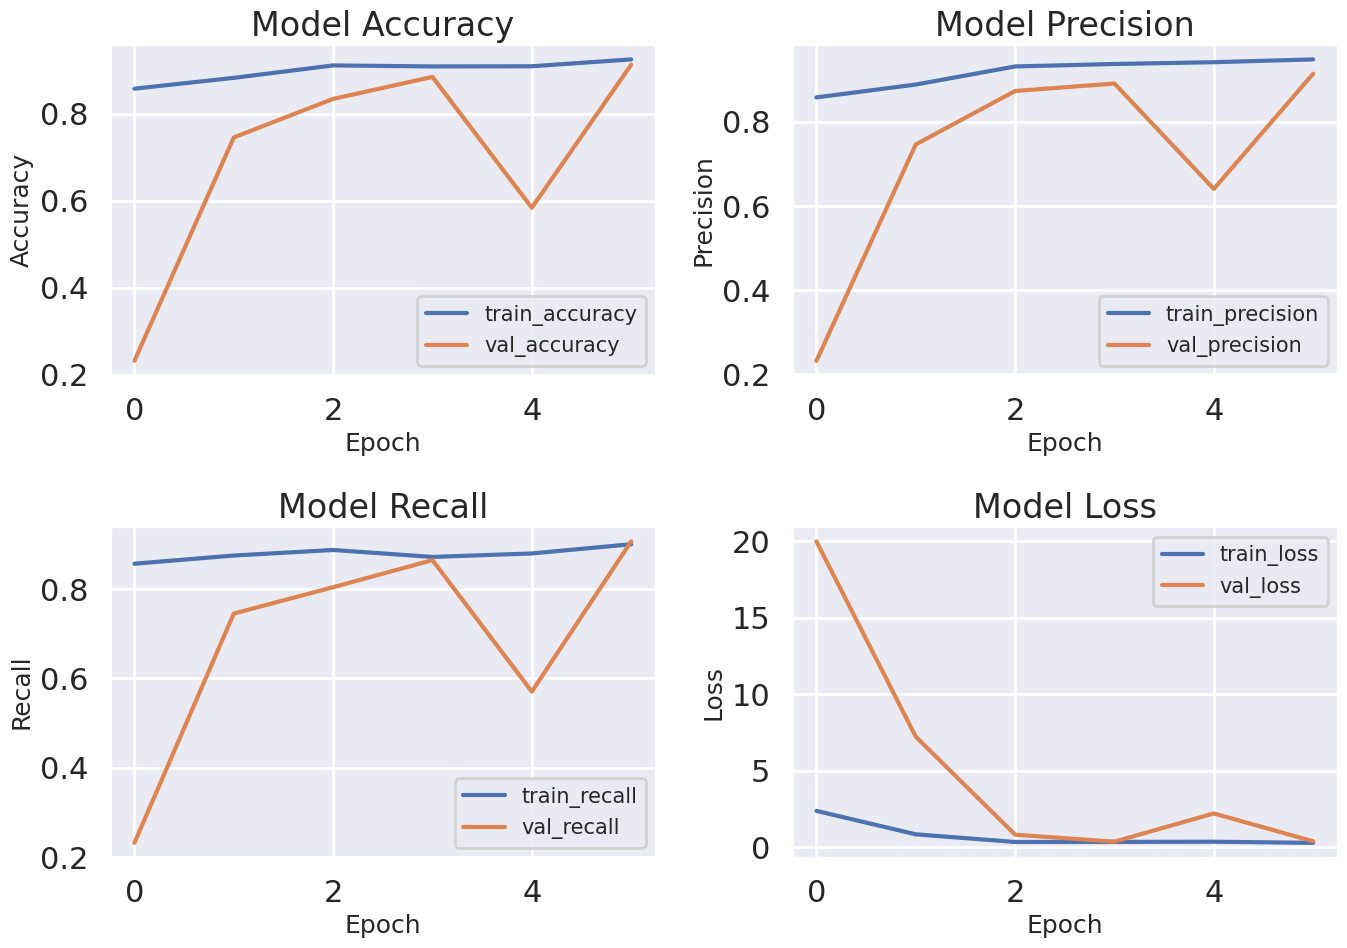

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Set up seaborn for styling
sns.set_theme()
sns.set_context("poster")

# Create a figure to plot all metrics
figure(figsize=(14, 10), dpi=100)

# Plot accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.legend(loc='best',fontsize=15)

# Plot precision
if 'precision' in history.history:
    plt.subplot(2, 2, 2)
    plt.plot(history.history['precision'], label='train_precision')
    plt.plot(history.history['val_precision'], label='val_precision')
    plt.title('Model Precision')
    plt.xlabel('Epoch',fontsize=18)
    plt.ylabel('Precision',fontsize=18)
    plt.legend(loc='best',fontsize=15)

# Plot recall
if 'recall' in history.history:
    plt.subplot(2, 2, 3)
    plt.plot(history.history['recall'], label='train_recall')
    plt.plot(history.history['val_recall'], label='val_recall')
    plt.title('Model Recall')
    plt.xlabel('Epoch',fontsize=18)
    plt.ylabel('Recall',fontsize=18)
    plt.legend(loc='best',fontsize=15)

# Plot loss
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend(loc='best',fontsize=15)

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [ ]:
import cv2

In [ ]:
model.save('newpathmodel3.keras')

Enter the file path:/content/download.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Exact Probabilities:
[[9.9999690e-01 3.4862178e-09 3.0585545e-06]]
Predicted Class Index:
[0]
The image is predicted to be a COVID19.


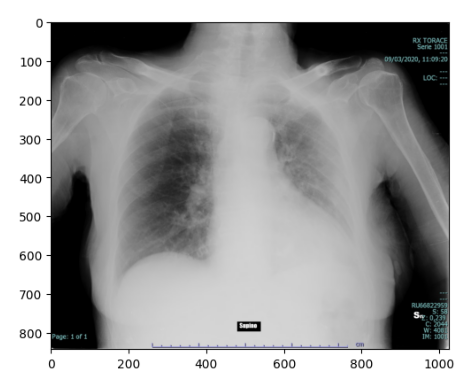

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

model = load_model('/content/drive/MyDrive/XrayDetection/newpathmodel3.keras')

def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

img_path = input('Enter the file path:')
test_img = cv2.imread(img_path)
plt.imshow(test_img)
plt.axis('off')

input_image = preprocess_image(img_path, target_size=(256, 256))

import numpy as np
# Predict the probabilities for the input image
predictions = model.predict(input_image)
print("Exact Probabilities:")
print(predictions)

# Get the class index with the highest probability
predicted_class_index = np.argmax(predictions, axis=1)
print("Predicted Class Index:")
print(predicted_class_index)

# Define the class labels
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA']

# Print the predicted class label
predicted_class_label = class_names[predicted_class_index[0]]
print("The image is predicted to be a", predicted_class_label + ".")
